In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Charger dataset 
file_path = 'C:/Users/Salma/OneDrive/Documents/Deep learning/FILL-ROUGE/game_played_purchesed.csv'
df = pd.read_csv(file_path)

#Calcule la moyenne de temps de jeu pour chaque jeu
average_times = df.groupby('game')['hours'].mean().reset_index()
average_times.columns = ['game', 'average_hours']

#Fusion le DataFrame d'origine avec les moyennes
df = pd.merge(df, average_times, on='game', how='left')

# Normaliser les temps de jeu en divisant par la moyenne respective du jeu
df['normalized_hours'] = df['hours'] / df['average_hours']

#les premières lignes du DataFrame avec les temps normalisés
print(df.head())

     user_id                                      game  behavior  hours  \
0  151603712         Fallout New Vegas Courier's Stash  purchase    1.0   
1  151603712              Fallout New Vegas Dead Money  purchase    1.0   
2  151603712           Fallout New Vegas Honest Hearts  purchase    1.0   
3  151603712  HuniePop Official Digital Art Collection  purchase    1.0   
4  151603712              HuniePop Original Soundtrack  purchase    1.0   

   average_hours  normalized_hours  
0            1.0               1.0  
1            1.0               1.0  
2            1.0               1.0  
3            1.0               1.0  
4            1.0               1.0  


In [3]:
# Sauvegarder le DataFrame fusionné en fichier CSV
result_file_path = 'C:/Users/Salma/OneDrive/Documents/Deep learning/FILL-ROUGE/games_normalized.csv'
df.to_csv(result_file_path, index=False)

C:\Users\Salma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


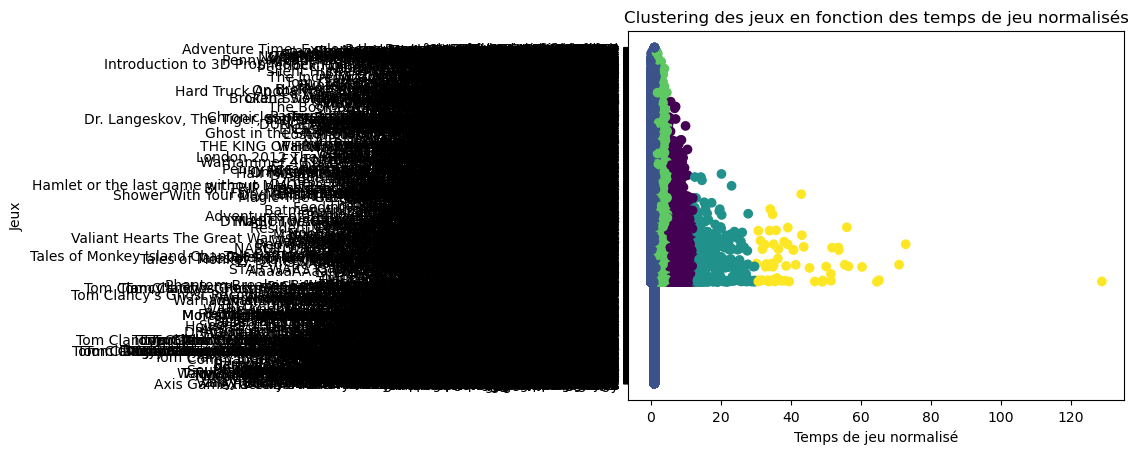

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sélection du nombre de clusters 
k = 5

# Sélection des données pour le clustering 
X = df[['normalized_hours']]

# Appliquer l'algorithme K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualisation des clusters
plt.scatter(df['normalized_hours'], df['game'], c=df['cluster'], cmap='viridis')
plt.title('Clustering des jeux en fonction des temps de jeu normalisés')
plt.xlabel('Temps de jeu normalisé')
plt.ylabel('Jeux')
plt.show()

In [8]:
from sklearn.cluster import KMeans

# Sélection du nombre de clusters (exemple avec 3 clusters)
k = 5

# Sélection des données pour le clustering (dans cet exemple, nous utilisons seulement 'normalized_hours')
X = df[['normalized_hours']]

# Appliquer l'algorithme K-Means en spécifiant explicitement n_init
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

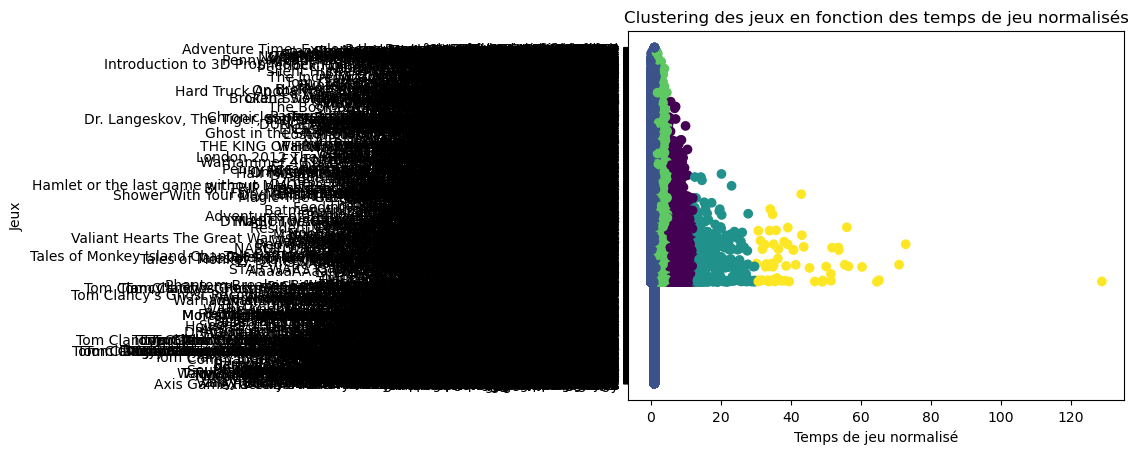

In [9]:
# Visualisation des clusters
plt.scatter(df['normalized_hours'], df['game'], c=df['cluster'], cmap='viridis')
plt.title('Clustering des jeux en fonction des temps de jeu normalisés')
plt.xlabel('Temps de jeu normalisé')
plt.ylabel('Jeux')
plt.show()